In [2]:
# importing all the neccessary libraries. dont forget to mount the drive

import numpy as np
import cv2 # to read files / images using cv2
import os #importing operating system 
import matplotlib.pyplot as plt
import matplotlib.image as img
from google.colab.patches import cv2_imshow # in new version cv2.imshow doesnt work
IMAGES_FOLDER_PATH = "/content/drive/My Drive/images" # creating a shorter name to store the path

In [3]:
q4_2= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"007_test1.png"))
q4_3= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"007_test2.png"))
q4_4= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"tanner.jpg"))
q4_4_corrupt= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"tanner_corrupt.jpg"))

In [8]:
# convert images to grayscale

q4_2gray = cv2.cvtColor(q4_2, cv2.COLOR_BGR2GRAY)
q4_3gray = cv2.cvtColor(q4_3, cv2.COLOR_BGR2GRAY) 


In [16]:
def bitQuantizeImage(Im,k) :
  eightbit = np.copy(Im)
  reduced = np.around((Im/255)*((2**k)-1))
  
  return reduced

In [17]:
# bitquantization for k=1 to k=7
quantizedtest1 = bitQuantizeImage(q4_2gray,1)
quantizedtest2 = bitQuantizeImage(q4_2gray,2)
quantizedtest3 = bitQuantizeImage(q4_2gray,3)
quantizedtest4 = bitQuantizeImage(q4_2gray,4)
quantizedtest5 = bitQuantizeImage(q4_2gray,5)
quantizedtest6 = bitQuantizeImage(q4_2gray,6)
quantizedtest7 = bitQuantizeImage(q4_2gray,7)
quantizedtest8 = bitQuantizeImage(q4_2gray,8)

(-0.5, 1886.5, 791.5, -0.5)

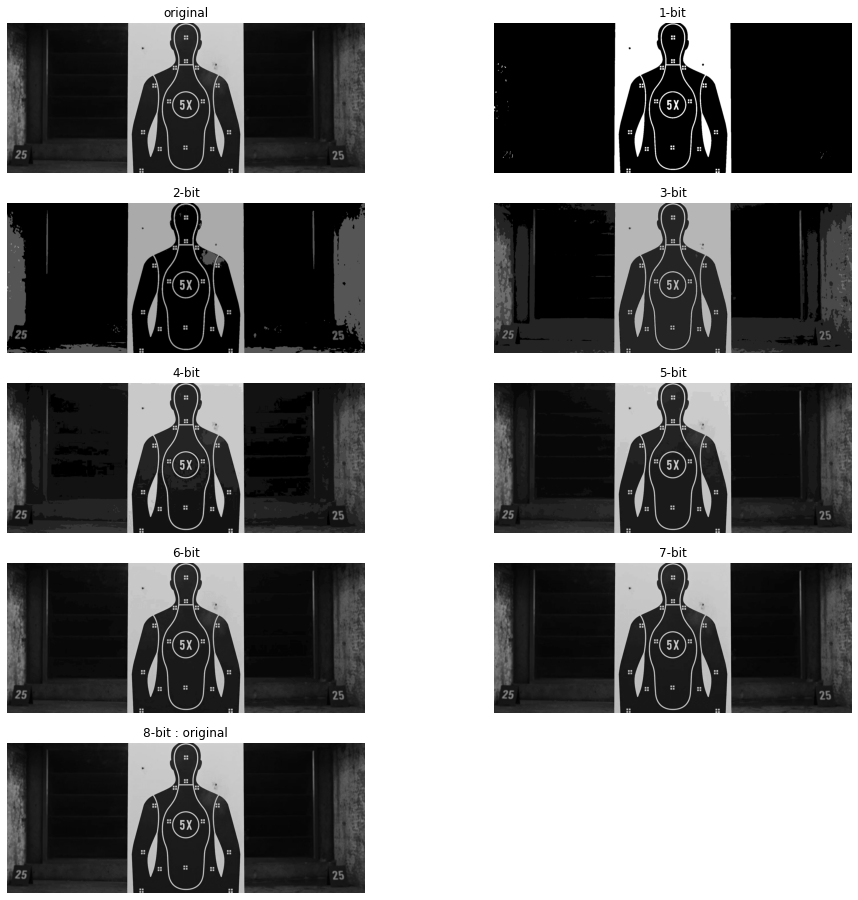

In [18]:
#dispaly
plt.figure(figsize=(16,16))
plt.subplot(5,2,1) #subplot(nrows,nowcolumns,index)
plt.imshow(q4_2gray, cmap='gray')
plt.title('original')
plt.axis('off') 
plt.subplot(5,2,2)
plt.imshow(quantizedtest1, cmap='gray')
plt.title('1-bit')
plt.axis('off')
plt.subplot(5,2,3)
plt.imshow(quantizedtest2, cmap='gray')
plt.title('2-bit')
plt.axis('off')
plt.subplot(5,2,4)
plt.imshow(quantizedtest3, cmap='gray')
plt.title('3-bit')
plt.axis('off')
plt.subplot(5,2,5)
plt.imshow(quantizedtest4 , cmap='gray')
plt.title('4-bit')
plt.axis('off') 
plt.subplot(5,2,6)
plt.imshow(quantizedtest5, cmap='gray')
plt.title('5-bit')
plt.axis('off')
plt.subplot(5,2,7)
plt.imshow(quantizedtest6, cmap='gray')
plt.title('6-bit')
plt.axis('off')
plt.subplot(5,2,8)
plt.imshow(quantizedtest7, cmap='gray')
plt.title('7-bit')
plt.axis('off')
plt.subplot(5,2,9)
plt.imshow(quantizedtest8, cmap='gray')
plt.title('8-bit : original')
plt.axis('off')


In [19]:
#bitplane slicing
# concept: suppose at any point intensity is 255 = 11111111, and we want just the first bit from the left ie msb, we can do bit wise and
# 11111111 and 10000000 = 10000000 i.e a masking operation
bitplane1 = np.bitwise_and(q4_3gray,128) # msb , 
bitplane2 = np.bitwise_and(q4_3gray,64)
bitplane3 = np.bitwise_and(q4_3gray,32)
bitplane4 = np.bitwise_and(q4_3gray,16)
bitplane5 = np.bitwise_and(q4_3gray,8)
bitplane6 = np.bitwise_and(q4_3gray,4)
bitplane7 = np.bitwise_and(q4_3gray,2)
bitplane8 = np.bitwise_and(q4_3gray,1) #lsb


(-0.5, 717.5, 775.5, -0.5)

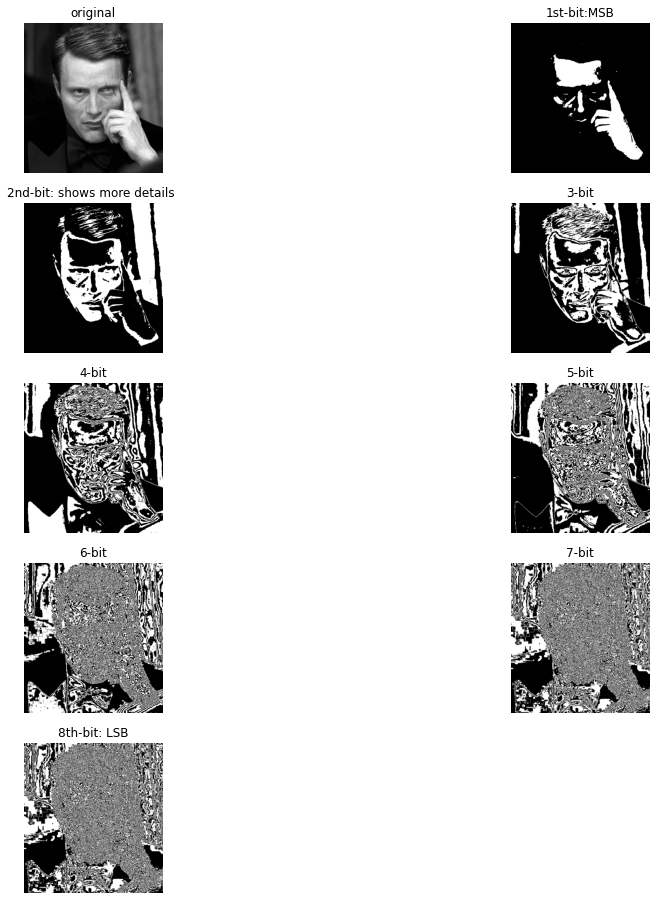

In [20]:
# diplaying bit planes
plt.figure(figsize=(16,16))
plt.subplot(5,2,1) #subplot(nrows,nowcolumns,index)
plt.imshow(q4_3gray, cmap='gray')
plt.title('original')
plt.axis('off') 
plt.subplot(5,2,2)
plt.imshow(bitplane1, cmap='gray')
plt.title('1st-bit:MSB')
plt.axis('off')
plt.subplot(5,2,3)
plt.imshow(bitplane2, cmap='gray')
plt.title('2nd-bit: shows more details ')
plt.axis('off')
plt.subplot(5,2,4)
plt.imshow(bitplane3, cmap='gray')
plt.title('3-bit')
plt.axis('off')
plt.subplot(5,2,5)
plt.imshow(bitplane4 , cmap='gray')
plt.title('4-bit')
plt.axis('off') 
plt.subplot(5,2,6)
plt.imshow(bitplane5, cmap='gray')
plt.title('5-bit')
plt.axis('off')
plt.subplot(5,2,7)
plt.imshow(bitplane6, cmap='gray')
plt.title('6-bit')
plt.axis('off')
plt.subplot(5,2,8)
plt.imshow(bitplane7, cmap='gray')
plt.title('7-bit')
plt.axis('off')
plt.subplot(5,2,9)
plt.imshow(bitplane7, cmap='gray')
plt.title('8th-bit: LSB')
plt.axis('off')

In [25]:
# Corruption : roll no. - 2020702009, 2020702009 mod 5 = 4 : Tanner
def corruption(img,k):
  imgnegative = 255 - img
  corruptimage1= bitQuantizeImage(imgnegative,k)
  corruptimage = corruptimage1 * np.around(255/127)

  return corruptimage


In [23]:
q4_4gray = cv2.cvtColor(q4_4, cv2.COLOR_BGR2GRAY)

In [26]:
tanner_corrupt = corruption(q4_4gray,7)

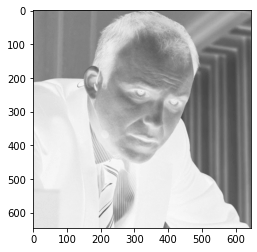

In [27]:
plt.imshow(tanner_corrupt, cmap='gray', vmin=0,vmax=255)